### This script relies on a active environment with Basemap
If that is not possible, you properly have to outcomment a thing or two.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
import ezodf

In [4]:
airports_1 = gpd.read_file('Data Sources/Global Airports Shapefile (1)/ne_10m_airports.shp')
airports_2 = gpd.read_file('Data Sources/Global Airports Shapefile 2 (1)/wld_trs_airports_wfp.shp')
ports_1 = gpd.read_file('Data Sources/Global Ports Shapefile (1)/WPI.shp')
ports_2= gpd.read_file('Data Sources/Global Ports Shapefile 2 (1)/ne_50m_ports.shp')

### Let's have a look at the first shapefile

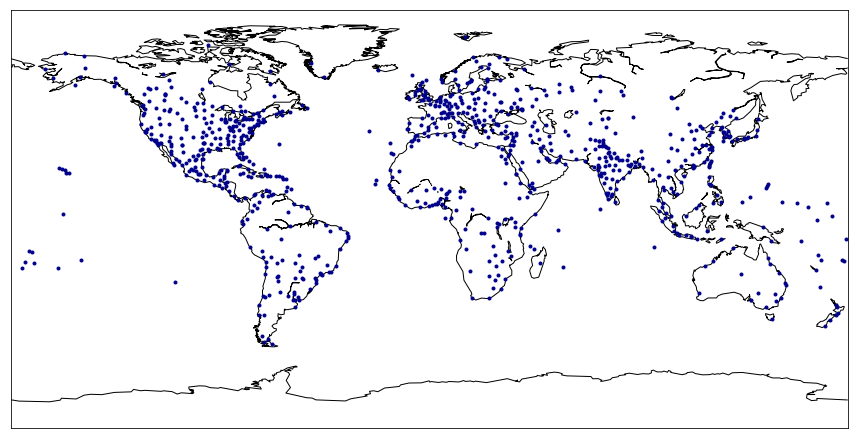

In [3]:
##### Visualising the airports
plt.figure(figsize=(15,15))
map = Basemap()
map.drawcoastlines()

for airport in airports_1.index:
    map.plot(list(airports_1.loc[airport].geometry.coords)[0][0],
            list(airports_1.loc[airport].geometry.coords)[0][1],color='darkblue',marker='o',markersize=3)

plt.show()

In [5]:
airports_1.shape

(891, 36)

In [6]:
airports_1.columns

Index(['scalerank', 'featurecla', 'type', 'name', 'abbrev', 'location',
       'gps_code', 'iata_code', 'wikipedia', 'natlscale', 'comments',
       'wikidataid', 'name_ar', 'name_bn', 'name_de', 'name_en', 'name_es',
       'name_fr', 'name_el', 'name_hi', 'name_hu', 'name_id', 'name_it',
       'name_ja', 'name_ko', 'name_nl', 'name_pl', 'name_pt', 'name_ru',
       'name_sv', 'name_tr', 'name_vi', 'name_zh', 'wdid_score', 'ne_id',
       'geometry'],
      dtype='object')

In [7]:
airports_1.head()

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,9,Airport,small,Sahnewal,LUH,terminal,VILD,LUH,http://en.wikipedia.org/wiki/Sahnewal_Airport,8.0,...,None,None,None,Ludhiana Airport,None,None,None,4,1159113785,POINT (75.95707224036518 30.85035985617018)
1,9,Airport,mid,Solapur,SSE,terminal,VASL,SSE,http://en.wikipedia.org/wiki/Solapur_Airport,8.0,...,None,None,None,None,None,None,None,4,1159113803,POINT (75.93305977107549 17.62541518363502)
2,9,Airport,mid,Birsa Munda,IXR,terminal,VERC,IXR,http://en.wikipedia.org/wiki/Birsa_Munda_Airport,8.0,...,Port lotniczy Ranchi,None,None,M. O. Ranchi,None,Sân bay Birsa Munda,蘭契,4,1159113831,POINT (85.32359703687671 23.31772459899619)
3,9,Airport,mid,Ahwaz,AWZ,terminal,OIAW,AWZ,http://en.wikipedia.org/wiki/Ahwaz_Airport,8.0,...,Port lotniczy Ahwaz,None,None,Ahwaz International Airport,Ahvaz Havalimanı,Sân bay Ahvaz,阿瓦士,4,1159113845,POINT (48.74710654359313 31.34315855607572)
4,9,Airport,mid and military,Gwalior,GWL,terminal,VIGR,GWL,http://en.wikipedia.org/wiki/Gwalior_Airport,8.0,...,Port lotniczy Gwalior,None,None,Gwalior Airport,None,Sân bay Gwalior,瓜廖爾,4,1159113863,POINT (78.21721865463483 26.28548769793701)


In [8]:
airports_1.natlscale.unique()

array([  8.,  10.,  15.,  20.,  30.,  50.,  75., 150.])

### Let's take a look at the second shapefile

4731
4732
4733
4738
4741
4780
4895
4897
4898
5739


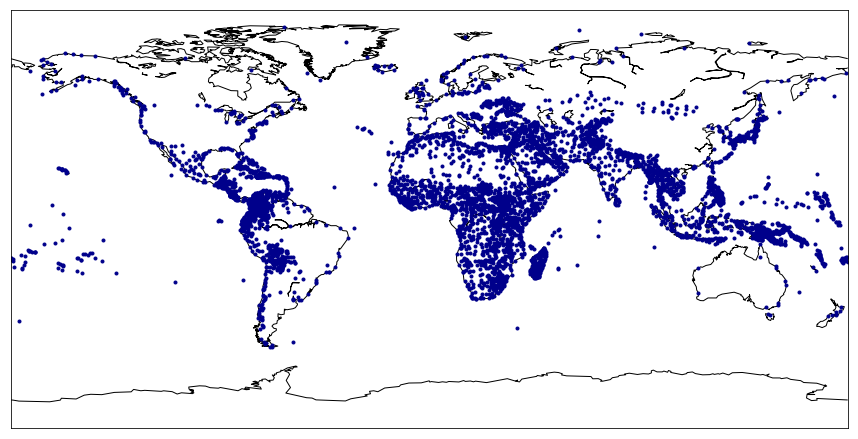

In [7]:
##### Visualising the airports
plt.figure(figsize=(15,15))
map = Basemap()
map.drawcoastlines()

for airport in airports_2.index:
    try:
        map.plot(list(airports_2.loc[airport].geometry.coords)[0][0],
                list(airports_2.loc[airport].geometry.coords)[0][1],color='darkblue',marker='o',markersize=3)
    except:
        # Necessary because some observations do not have a geometry attached.
        print(airport)

plt.show()

In [8]:
airports_2.columns

Index(['nameshort', 'namelong', 'namealt', 'city', 'icao', 'iata', 'apttype',
       'aptclass', 'authority', 'status', 'dmg', 'rwpaved', 'rwlengthm',
       'rwlengthf', 'elevm', 'elevf', 'humuse', 'humoperate', 'locprecisi',
       'latitude', 'longitude', 'iso3', 'iso3_op', 'country', 'lastcheckd',
       'remarks', 'url_lca', 'source', 'createdate', 'updatedate', 'geonameid',
       'gdb_geomat', 'rwwidthm', 'geometry'],
      dtype='object')

In [9]:
airports_2.head()

,nameshort,namelong,namealt,city,icao,iata,apttype,aptclass,authority,status,...,lastcheckd,remarks,url_lca,source,createdate,updatedate,geonameid,gdb_geomat,rwwidthm,geometry
0,La Javilla,La Javilla Airport,None,None,MLLJ,None,Airstrip,Unspecified,None,Open,...,2018-05-11,None,None,None,2018-05-11,2018-05-12,3623378.0,None,NaN,POINT (-85.29550170900001 9.811120033000009)
1,Murtala Muhammed,Murtala Muhammed,None,Lagos,DNMM,LOS,Airport,International,Civil/Military,Open,...,None,None,None,None,2013-05-14,2016-12-02,2332459.0,None,NaN,POINT (3.32213999999999 6.578530000000001)
2,Bida,Bida Airport,None,Bida,DNBI,None,Airstrip,Domestic,Civil,Open,...,None,None,None,None,2013-05-14,2016-12-02,2347209.0,None,NaN,POINT (6.015280000000018 9.103470000000016)
3,Kainji,Kainji,None,None,DNIX,None,Airfield,Domestic,Military,Unknown,...,None,None,None,None,2013-05-14,2016-12-02,NaN,None,NaN,POINT (4.485450000000014 9.89267000000001)
4,Katsina,Katsina,None,Katsina,None,None,Airfield,Domestic,Civil,Open,...,None,None,None,None,2013-05-14,2016-12-02,2334802.0,None,NaN,POINT (7.660000000000025 13.00799999999998)


In [10]:
# The number of airports
airports_2.shape

(6582, 34)

In [11]:
airports_2.authority.unique()

array([None, 'Civil/Military', 'Civil', 'Military', 'Private', 'Unknown',
       'Civil Public', 'International', 'Military/Civil', 'Domestic'],
      dtype=object)

In [12]:
civilAirports = airports_2[airports_2.status == 'Open']

In [13]:

{airportAuthority:sum([1 for obs in civilAirports.authority if obs == airportAuthority]) for airportAuthority in civilAirports.authority.unique()}#airports_2

{None: 131,
 'Civil/Military': 245,
 'Civil': 2462,
 'Private': 57,
 'Unknown': 1460,
 'Military': 292,
 'Civil Public': 5,
 'Military/Civil': 1,
 'Domestic': 1}

In [14]:
civilAirports.head()

,nameshort,namelong,namealt,city,icao,iata,apttype,aptclass,authority,status,...,lastcheckd,remarks,url_lca,source,createdate,updatedate,geonameid,gdb_geomat,rwwidthm,geometry
0,La Javilla,La Javilla Airport,None,None,MLLJ,None,Airstrip,Unspecified,None,Open,...,2018-05-11,None,None,None,2018-05-11,2018-05-12,3623378.0,None,NaN,POINT (-85.29550170900001 9.811120033000009)
1,Murtala Muhammed,Murtala Muhammed,None,Lagos,DNMM,LOS,Airport,International,Civil/Military,Open,...,None,None,None,None,2013-05-14,2016-12-02,2332459.0,None,NaN,POINT (3.32213999999999 6.578530000000001)
2,Bida,Bida Airport,None,Bida,DNBI,None,Airstrip,Domestic,Civil,Open,...,None,None,None,None,2013-05-14,2016-12-02,2347209.0,None,NaN,POINT (6.015280000000018 9.103470000000016)
4,Katsina,Katsina,None,Katsina,None,None,Airfield,Domestic,Civil,Open,...,None,None,None,None,2013-05-14,2016-12-02,2334802.0,None,NaN,POINT (7.660000000000025 13.00799999999998)
5,Escravos,Escravos,None,None,None,None,Airstrip,Domestic,Private,Open,...,None,None,None,None,2013-05-14,2016-12-02,NaN,None,NaN,POINT (5.18707999999998 5.61387000000002)


In [15]:
civilAirports.shape

(4654, 34)

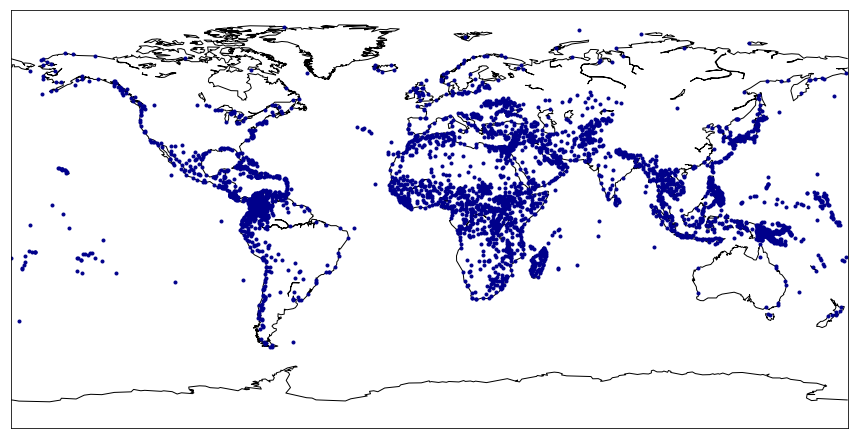

In [16]:
# Plotting the civil airports

plt.figure(figsize=(15,15))
map = Basemap()
map.drawcoastlines()

for airport in civilAirports.index:
    map.plot(list(civilAirports.loc[airport].geometry.coords)[0][0],
            list(civilAirports.loc[airport].geometry.coords)[0][1],color='darkblue',marker='o',markersize=3)

plt.show()

In [17]:
# There are different airport types as well, let's see the distribution of these as well.
{airportType:sum([1 for obs in civilAirports.apttype if obs == airportType]) for airportType in civilAirports.apttype}

{'Airstrip': 1846,
 'Airport': 1290,
 'Airfield': 927,
 'Helipad': 239,
 'Unknown': 349,
 None: 2,
 'Airstript': 1}

In [18]:
# Let's just keep all those thich are listed as airports.
civilActualAirports = civilAirports[civilAirports.apttype =='Airfield']
civilActualAirports = civilActualAirports.reset_index(drop=True)

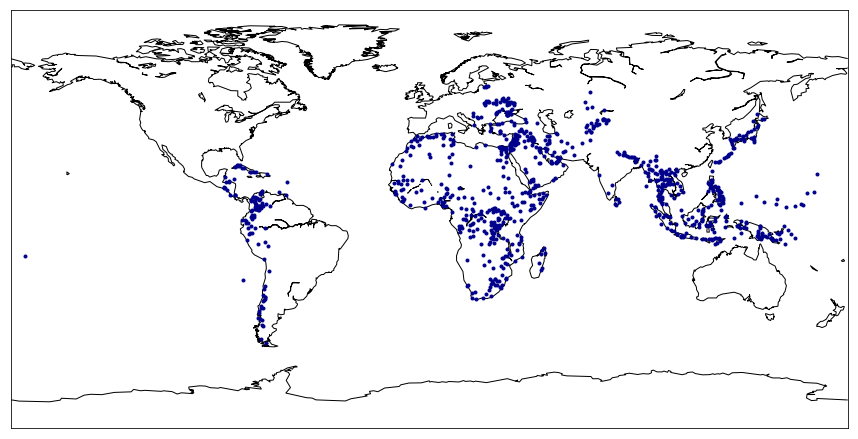

In [19]:
# Plotting the civil airports

plt.figure(figsize=(15,15))
map = Basemap()
map.drawcoastlines()

for airport in civilActualAirports.index:
    map.plot(list(civilActualAirports.loc[airport].geometry.coords)[0][0],
            list(civilActualAirports.loc[airport].geometry.coords)[0][1],color='darkblue',marker='o',markersize=3)

plt.show()

Seems a bit weird that there are no airports in Europe all of sudden

In [20]:
civilAirports[civilAirports.city =='Copenhagen']

,nameshort,namelong,namealt,city,icao,iata,apttype,aptclass,authority,status,...,lastcheckd,remarks,url_lca,source,createdate,updatedate,geonameid,gdb_geomat,rwwidthm,geometry


In [21]:
airports_1[airports_1.abbrev=='CPH']

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
804,3,Airport,major,Copenhagen,CPH,terminal,EKCH,CPH,http://en.wikipedia.org/wiki/Copenhagen_Airport,75.0,...,Port lotniczy Kopenhaga-Kastrup,Aeroporto de Copenhaga,Каструп,Köpenhamns flygplats,Kopenhag Havalimanı,Sân bay Copenhagen,哥本哈根凯斯楚普机场,4,1159126853,POINT (12.64935086845077 55.62850172215278)


In [22]:
# Airports have different status, let check the distribution to see if we can reduce the number of observations even more.
{status:sum([1 for obs in civilAirports.status if obs == status]) for status in civilAirports.status}

{'Open': 4654}

In [23]:
openCivilAirports = civilAirports[civilAirports.status=='Open']
openCivilAirports = openCivilAirports.reset_index(drop=True)

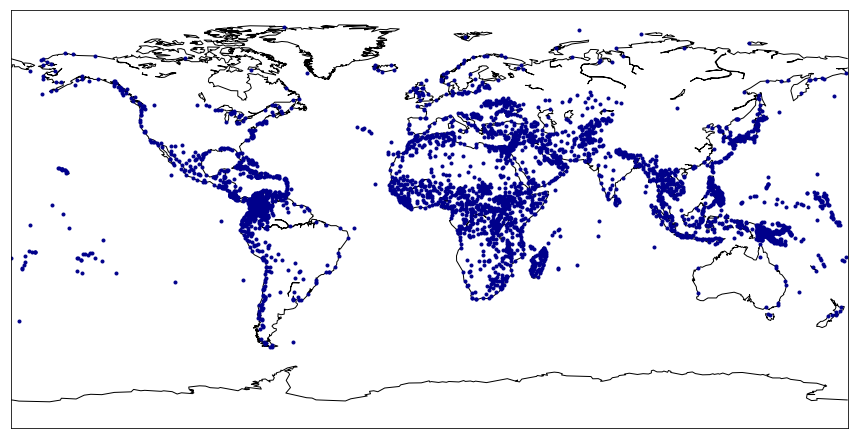

In [24]:
# Let's please the open ones.

plt.figure(figsize=(15,15))
map = Basemap()
map.drawcoastlines()

for airport in openCivilAirports.index:
    map.plot(list(openCivilAirports.loc[airport].geometry.coords)[0][0],
            list(openCivilAirports.loc[airport].geometry.coords)[0][1],color='darkblue',marker='o',markersize=3)

plt.show()

In [25]:
openCivilAirports.head()

,nameshort,namelong,namealt,city,icao,iata,apttype,aptclass,authority,status,...,lastcheckd,remarks,url_lca,source,createdate,updatedate,geonameid,gdb_geomat,rwwidthm,geometry
0,La Javilla,La Javilla Airport,None,None,MLLJ,None,Airstrip,Unspecified,None,Open,...,2018-05-11,None,None,None,2018-05-11,2018-05-12,3623378.0,None,NaN,POINT (-85.29550170900001 9.811120033000009)
1,Murtala Muhammed,Murtala Muhammed,None,Lagos,DNMM,LOS,Airport,International,Civil/Military,Open,...,None,None,None,None,2013-05-14,2016-12-02,2332459.0,None,NaN,POINT (3.32213999999999 6.578530000000001)
2,Bida,Bida Airport,None,Bida,DNBI,None,Airstrip,Domestic,Civil,Open,...,None,None,None,None,2013-05-14,2016-12-02,2347209.0,None,NaN,POINT (6.015280000000018 9.103470000000016)
3,Katsina,Katsina,None,Katsina,None,None,Airfield,Domestic,Civil,Open,...,None,None,None,None,2013-05-14,2016-12-02,2334802.0,None,NaN,POINT (7.660000000000025 13.00799999999998)
4,Escravos,Escravos,None,None,None,None,Airstrip,Domestic,Private,Open,...,None,None,None,None,2013-05-14,2016-12-02,NaN,None,NaN,POINT (5.18707999999998 5.61387000000002)


In [26]:
pointCoordinates = np.array([list(openCivilAirports.geometry.loc[obs].coords)[0] for obs in openCivilAirports.index])

In [27]:
# Let's now store the point coordinates for the first airport-shapefile as well, and see if there are similarity between
# the observations in each file.
pointCoordinatesAirports_1 = np.array([list(airports_1.geometry.loc[obs].coords)[0] for obs in airports_1.index])

In [28]:
print('The number of similar observations are: ', sum([True if point in pointCoordinates else False for point in pointCoordinatesAirports_1]))

The number of similar observations are:  0


In [29]:
UKAirportsFreight = pd.read_csv('Data Sources/UK Airport Data (2)/Table_13_Freight_by_Type_and_Nationality(1).csv',
                                parse_dates = ['rundate'])

In [30]:
UKAirportsFreight

,rundate,reporting_period,reporting_airport_group_name,reporting_airport_name,total_freight,freight_set_down_scheduled_UK,freight_picked_up_scheduled_UK,freight_set_down_scheduled_foreign_EU,freight_picked_up_scheduled_foreign_EU,freight_set_down_scheduled_foreign_non_EU,freight_picked_up_scheduled_foreign_non_EU,freight_set_down_charter_UK,freight_picked_up_charter_UK,freight_set_down_charter_foreign_EU,freight_picked_up_charter_foreign_EU,freight_set_down_charter_foreign_non_EU,freight_picked_up_charter_foreign_non_EU
0,2019-04-12 14:30:31,201902,London Area Airports,GATWICK,8608.969,1601.790,4120.024,18.855,32.633,1056.073,1616.481,98.721,64.392,0.000,0.000,0.000,0.000
1,2019-04-12 14:30:31,201902,London Area Airports,HEATHROW,128064.672,23871.258,29608.274,2931.209,2370.728,33903.267,35379.936,0.000,0.000,0.000,0.000,0.000,0.000
2,2019-04-12 14:30:31,201902,London Area Airports,LUTON,3062.702,0.000,0.000,2482.777,173.315,249.871,152.767,0.000,3.972,0.000,0.000,0.000,0.000
3,2019-04-12 14:30:31,201902,London Area Airports,STANSTED,14591.857,240.881,21.150,924.600,256.402,7503.910,5582.581,0.000,0.000,0.000,0.000,62.333,0.000
4,2019-04-12 14:30:31,201902,Other UK Airports,ABERDEEN,450.834,3.273,12.331,6.838,13.057,9.556,7.460,49.521,72.446,163.281,113.071,0.000,0.000
5,2019-04-12 14:30:31,201902,Other UK Airports,BARRA,0.941,0.941,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,2019-04-12 14:30:31,201902,Other UK Airports,BELFAST CITY (GEORGE BEST),15.131,8.760,5.304,0.935,0.132,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,2019-04-12 14:30:31,201902,Other UK Airports,BELFAST INTERNATIONAL,2172.945,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.596,1420.772,740.664,0.000,4.913
8,2019-04-12 14:30:31,201902,Other UK Airports,BENBECULA,2.621,2.122,0.499,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,2019-04-12 14:30:31,201902,Other UK Airports,BIRMINGHAM,2145.088,14.071,12.889,74.611,44.148,1133.689,858.399,0.981,0.246,0.000,0.000,6.054,0.000


In [31]:
UKAirportsFreight.sort_values(by=['total_freight'],ascending = False)

,rundate,reporting_period,reporting_airport_group_name,reporting_airport_name,total_freight,freight_set_down_scheduled_UK,freight_picked_up_scheduled_UK,freight_set_down_scheduled_foreign_EU,freight_picked_up_scheduled_foreign_EU,freight_set_down_scheduled_foreign_non_EU,freight_picked_up_scheduled_foreign_non_EU,freight_set_down_charter_UK,freight_picked_up_charter_UK,freight_set_down_charter_foreign_EU,freight_picked_up_charter_foreign_EU,freight_set_down_charter_foreign_non_EU,freight_picked_up_charter_foreign_non_EU
1,2019-04-12 14:30:31,201902,London Area Airports,HEATHROW,128064.672,23871.258,29608.274,2931.209,2370.728,33903.267,35379.936,0.000,0.000,0.000,0.000,0.000,0.000
12,2019-04-12 14:30:31,201902,Other UK Airports,EAST MIDLANDS INTERNATIONAL,24427.571,1151.708,1027.371,3671.294,4317.857,2260.787,1850.626,2.043,0.000,4906.103,5151.560,67.556,20.666
3,2019-04-12 14:30:31,201902,London Area Airports,STANSTED,14591.857,240.881,21.150,924.600,256.402,7503.910,5582.581,0.000,0.000,0.000,0.000,62.333,0.000
0,2019-04-12 14:30:31,201902,London Area Airports,GATWICK,8608.969,1601.790,4120.024,18.855,32.633,1056.073,1616.481,98.721,64.392,0.000,0.000,0.000,0.000
21,2019-04-12 14:30:31,201902,Other UK Airports,MANCHESTER,7747.965,238.615,481.956,56.314,44.409,3581.368,3269.226,37.848,17.283,1.260,0.000,0.001,19.685
2,2019-04-12 14:30:31,201902,London Area Airports,LUTON,3062.702,0.000,0.000,2482.777,173.315,249.871,152.767,0.000,3.972,0.000,0.000,0.000,0.000
7,2019-04-12 14:30:31,201902,Other UK Airports,BELFAST INTERNATIONAL,2172.945,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.596,1420.772,740.664,0.000,4.913
9,2019-04-12 14:30:31,201902,Other UK Airports,BIRMINGHAM,2145.088,14.071,12.889,74.611,44.148,1133.689,858.399,0.981,0.246,0.000,0.000,6.054,0.000
11,2019-04-12 14:30:31,201902,Other UK Airports,DONCASTER SHEFFIELD,1532.069,0.000,0.000,0.000,0.000,1337.284,3.897,0.000,0.000,0.000,0.000,0.000,190.888
13,2019-04-12 14:30:31,201902,Other UK Airports,EDINBURGH,1414.763,1.339,0.000,335.121,304.876,0.000,0.000,0.000,0.000,435.799,337.628,0.000,0.000


In [32]:
UKAirportsFreight = UKAirportsFreight.sort_values(by=['total_freight'],ascending = False)
UKAirportsFreight = UKAirportsFreight.reset_index(drop=True)
topFiveUKAirports = UKAirportsFreight.loc[0:4]

In [33]:
topFiveUKAirports

,rundate,reporting_period,reporting_airport_group_name,reporting_airport_name,total_freight,freight_set_down_scheduled_UK,freight_picked_up_scheduled_UK,freight_set_down_scheduled_foreign_EU,freight_picked_up_scheduled_foreign_EU,freight_set_down_scheduled_foreign_non_EU,freight_picked_up_scheduled_foreign_non_EU,freight_set_down_charter_UK,freight_picked_up_charter_UK,freight_set_down_charter_foreign_EU,freight_picked_up_charter_foreign_EU,freight_set_down_charter_foreign_non_EU,freight_picked_up_charter_foreign_non_EU
0,2019-04-12 14:30:31,201902,London Area Airports,HEATHROW,128064.672,23871.258,29608.274,2931.209,2370.728,33903.267,35379.936,0.000,0.000,0.000,0.00,0.000,0.000
1,2019-04-12 14:30:31,201902,Other UK Airports,EAST MIDLANDS INTERNATIONAL,24427.571,1151.708,1027.371,3671.294,4317.857,2260.787,1850.626,2.043,0.000,4906.103,5151.56,67.556,20.666
2,2019-04-12 14:30:31,201902,London Area Airports,STANSTED,14591.857,240.881,21.150,924.600,256.402,7503.910,5582.581,0.000,0.000,0.000,0.00,62.333,0.000
3,2019-04-12 14:30:31,201902,London Area Airports,GATWICK,8608.969,1601.790,4120.024,18.855,32.633,1056.073,1616.481,98.721,64.392,0.000,0.00,0.000,0.000
4,2019-04-12 14:30:31,201902,Other UK Airports,MANCHESTER,7747.965,238.615,481.956,56.314,44.409,3581.368,3269.226,37.848,17.283,1.260,0.00,0.001,19.685


In [35]:
airports_1[airports_1.abbrev == 'LHR'] 

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
832,2,Airport,major,London Heathrow,LHR,parking,EGLL,LHR,http://en.wikipedia.org/wiki/London_Heathrow_A...,150.0,...,Port lotniczy Londyn-Heathrow,Aeroporto de Londres Heathrow,Хитроу,London-Heathrow flygplats,Heathrow Havalimanı,Sân bay London Heathrow,伦敦希思罗机场,4,1159127237,POINT (-0.4531566520633094 51.47099587999384)


In [83]:
print('The top five UK airports are:\n')
[print(topFiveName.lower()) for topFiveName in topFiveUKAirports.reporting_airport_name]

print('\nHow many of the top five airports in UK are in the first shapefile? Answer:',
      sum([1 if any([True if topFiveName.lower() in name.lower() else False for name in airports_1.name])\
           else 0 for topFiveName in topFiveUKAirports.reporting_airport_name]))

print('\nHow about the second shapefile? Answer:',
      sum([1 if any([True if topFiveName.lower() in name.lower() else False for name in noNoneNameshort.nameshort])\
           else 0 for topFiveName in topFiveUKAirports.reporting_airport_name]))


The top five UK airports are:

heathrow
east midlands international
stansted
gatwick
manchester

How many of the top five airports in UK are in the first shapefile? Answer: 3

How about the second shapefile? Answer: 0


In [87]:
print('Which are the airports present?\n')
[print(topFiveName) if any([True if topFiveName.lower() in name.lower() else False for name in airports_1.name])\
           else 0 for topFiveName in topFiveUKAirports.reporting_airport_name]
print()

Which are the airports present?

HEATHROW
GATWICK
MANCHESTER



In [61]:
# Not needed anyway
for i,name in enumerate(airports_2.nameshort):
    try:
        if 'heathrow' in name.lower():
            print('Im here!',i)
    except:
        airports_2.nameshort.loc[i] = 'empty'

C:\Users\Krist\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [63]:
noNoneNameshort = airports_2[airports_2.nameshort!='empty']

In [64]:
noNoneNameshort.shape

(6528, 34)

In [65]:
airports_2.shape

(6582, 34)

### Let's see the ports.

#### First shapefile (WPI)

In [29]:
ports_1 = gpd.read_file('Data Sources/Global Ports Shapefile (1)/WPI.shp')

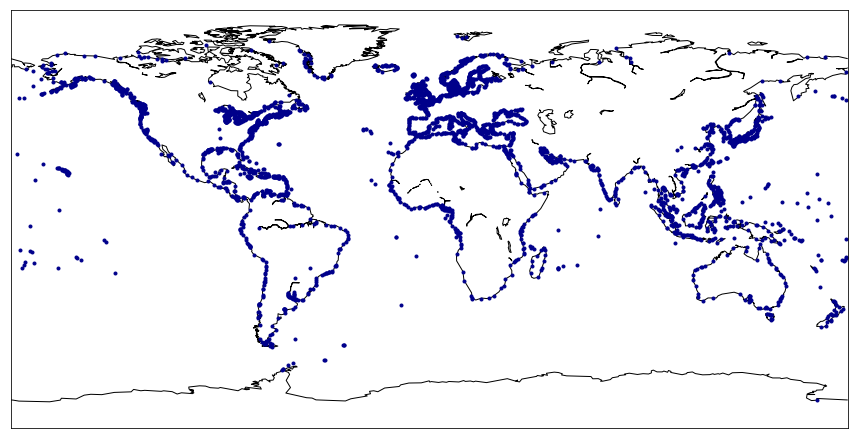

In [111]:
# Let's visualise the ports
# Plotting the civil airports

plt.figure(figsize=(15,15))
map = Basemap()
map.drawcoastlines()

for port in ports_1.index:
    map.plot(list(ports_1.loc[port].geometry.coords)[0][0],
            list(ports_1.loc[port].geometry.coords)[0][1],color='darkblue',marker='o',markersize=3)

plt.show()

In [31]:
ports_1.columns

Index(['INDEX_NO', 'REGION_NO', 'PORT_NAME', 'COUNTRY', 'LATITUDE',
       'LONGITUDE', 'LAT_DEG', 'LAT_MIN', 'LAT_HEMI', 'LONG_DEG', 'LONG_MIN',
       'LONG_HEMI', 'PUB', 'CHART', 'HARBORSIZE', 'HARBORTYPE', 'SHELTER',
       'ENTRY_TIDE', 'ENTRYSWELL', 'ENTRY_ICE', 'ENTRYOTHER', 'OVERHD_LIM',
       'CHAN_DEPTH', 'ANCH_DEPTH', 'CARGODEPTH', 'OIL_DEPTH', 'TIDE_RANGE',
       'MAX_VESSEL', 'HOLDGROUND', 'TURN_BASIN', 'PORTOFENTR', 'US_REP',
       'ETAMESSAGE', 'PILOT_REQD', 'PILOTAVAIL', 'LOC_ASSIST', 'PILOTADVSD',
       'TUGSALVAGE', 'TUG_ASSIST', 'PRATIQUE', 'SSCC_CERT', 'QUAR_OTHER',
       'COMM_PHONE', 'COMM_FAX', 'COMM_RADIO', 'COMM_VHF', 'COMM_AIR',
       'COMM_RAIL', 'CARGOWHARF', 'CARGO_ANCH', 'CARGMDMOOR', 'CARBCHMOOR',
       'CARICEMOOR', 'MED_FACIL', 'GARBAGE', 'DEGAUSS', 'DRTYBALLST',
       'CRANEFIXED', 'CRANEMOBIL', 'CRANEFLOAT', 'LIFT_100_', 'LIFT50_100',
       'LIFT_25_49', 'LIFT_0_24', 'LONGSHORE', 'ELECTRICAL', 'SERV_STEAM',
       'NAV_EQUIP', 'ELECREPAIR', '

In [32]:
ports_1.head()

,INDEX_NO,REGION_NO,PORT_NAME,COUNTRY,LATITUDE,LONGITUDE,LAT_DEG,LAT_MIN,LAT_HEMI,LONG_DEG,...,PROVISIONS,WATER,FUEL_OIL,DIESEL,DECKSUPPLY,ENG_SUPPLY,REPAIRCODE,DRYDOCK,RAILWAY,geometry
0,61090.0,61070.0,SHAKOTAN,RU,43.866667,146.833333,43.0,52.0,N,146.0,...,None,None,None,None,None,None,None,None,None,POINT (146.8333333333333 43.86666666666667)
1,61110.0,61100.0,MOMBETSU KO,JP,44.350000,143.350000,44.0,21.0,N,143.0,...,None,Y,None,Y,None,None,C,None,None,POINT (143.35 44.35)
2,61120.0,61100.0,ABASHIRI KO,JP,44.016667,144.283333,44.0,1.0,N,144.0,...,None,Y,None,Y,None,None,C,None,None,POINT (144.2833333333333 44.01666666666667)
3,61130.0,61100.0,NEMURO KO,JP,43.333333,145.583333,43.0,20.0,N,145.0,...,Y,Y,Y,None,None,None,None,None,None,POINT (145.5833333333333 43.33333333333334)
4,61140.0,61100.0,HANASAKI KO,JP,43.283333,145.583333,43.0,17.0,N,145.0,...,None,Y,Y,None,None,None,None,None,None,POINT (145.5833333333333 43.28333333333333)


In [33]:
ports_1.shape

(3669, 79)

In [34]:
ports_1.HARBORSIZE.unique()

array(['V', 'S', 'M', 'L', None], dtype=object)

In [35]:
{size:sum([True if obs == size else False for obs in ports_1.HARBORSIZE]) for size in ports_1.HARBORSIZE.unique()}

{'V': 2153, 'S': 990, 'M': 361, 'L': 160, None: 5}

We are interested in the largest ports around the world, namely 'M' and 'L'.

In [126]:
#sizeMLIndcies = [i for i,s in enumerate(ports_1.HARBORSIZE) if s in ('M','L')]
sizeMLPorts = ports_1[(ports_1.HARBORSIZE == 'M') | (ports_1.HARBORSIZE == 'L')]
sizeMLPorts = sizeMLPorts.reset_index(drop=True)

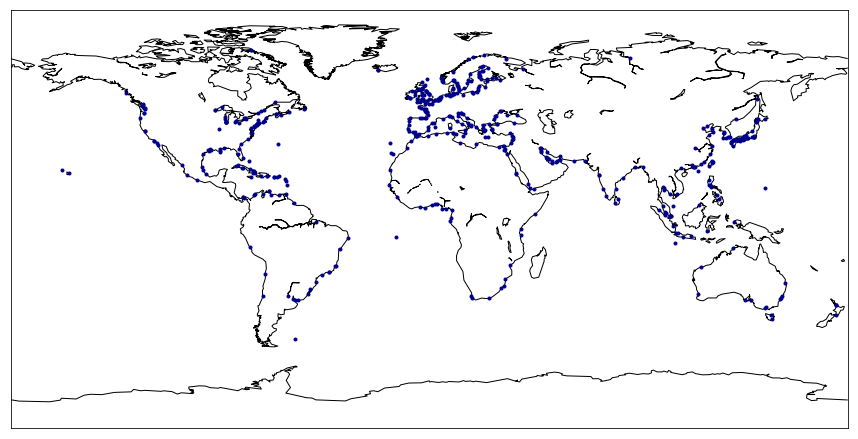

In [127]:
# Plot the V sized ports
# Plotting the civil airports

plt.figure(figsize=(15,15))
map = Basemap()
map.drawcoastlines()

for port in sizeMLPorts.index:
    map.plot(list(sizeMLPorts.loc[port].geometry.coords)[0][0],
            list(sizeMLPorts.loc[port].geometry.coords)[0][1],color='darkblue',marker='o',markersize=3)

plt.show()

In [128]:
sizeMLPorts.head()

,INDEX_NO,REGION_NO,PORT_NAME,COUNTRY,LATITUDE,LONGITUDE,LAT_DEG,LAT_MIN,LAT_HEMI,LONG_DEG,...,PROVISIONS,WATER,FUEL_OIL,DIESEL,DECKSUPPLY,ENG_SUPPLY,REPAIRCODE,DRYDOCK,RAILWAY,geometry
0,61160.0,61100.0,KUSHIRO KO,JP,42.983333,144.366667,42.0,59.0,N,144.0,...,Y,Y,Y,Y,Y,Y,C,None,M,POINT (144.3666666666667 42.98333333333333)
1,61170.0,61100.0,MURORAN KO,JP,42.350000,140.966667,42.0,21.0,N,140.0,...,None,Y,Y,None,None,None,A,M,L,POINT (140.9666666666667 42.35)
2,61190.0,61100.0,HAKODATE KO,JP,41.783333,140.716667,41.0,47.0,N,140.0,...,Y,Y,Y,Y,Y,Y,B,M,L,POINT (140.7166666666667 41.78333333333333)
3,61230.0,61100.0,OTARU KO,JP,43.200000,141.016667,43.0,12.0,N,141.0,...,Y,Y,Y,Y,Y,Y,C,None,S,POINT (141.0166666666667 43.2)
4,61385.0,61100.0,KAWASAKI KO,JP,35.500000,139.766667,35.0,30.0,N,139.0,...,Y,Y,Y,Y,Y,None,A,M,M,POINT (139.7666666666667 35.5)


#### Let's take a look at some cargo-related variables.

In [39]:
cargoColumns = [column for column in ports_1.columns if 'cargo' in column.lower()]

In [40]:
cargoColumns

['CARGODEPTH', 'CARGOWHARF', 'CARGO_ANCH']

In [41]:
for column in cargoColumns:
    print('%s\n' % column)
    print({uniVal:sum([True if obs == uniVal else False for obs in ports_1[column]]) for uniVal in ports_1[column].unique()},'\n')

CARGODEPTH

{'O': 339, 'J': 325, None: 453, 'K': 392, 'G': 121, 'F': 49, 'P': 268, 'H': 154, 'L': 457, 'M': 450, 'D': 12, 'E': 38, 'B': 15, 'N': 533, 'A': 25, 'Q': 29, 'C': 9} 

CARGOWHARF

{None: 875, 'Y': 2787, 'N': 7} 

CARGO_ANCH

{'Y': 1547, None: 2083, 'N': 39} 



And cargo variables for our sized-subset

In [129]:
for column in cargoColumns:
    print('%s\n' % column)
    print({uniVal:sum([True if obs == uniVal else False for obs in sizeMLPorts[column]]) for uniVal in sizeMLPorts[column].unique()},'\n')

CARGODEPTH

{'G': 53, 'F': 18, 'B': 6, 'J': 83, 'L': 63, 'K': 70, 'H': 55, 'M': 64, 'N': 41, 'E': 21, 'D': 4, 'P': 3, None: 25, 'O': 10, 'C': 2, 'A': 3} 

CARGOWHARF

{'Y': 488, None: 33} 

CARGO_ANCH

{None: 300, 'Y': 211, 'N': 10} 



### Country distribution

In [132]:
print({C:sum([True if obs == C else False for obs in sizeMLPorts.COUNTRY]) for C in sizeMLPorts.COUNTRY.unique()},'\n')
print('\nThere are %i countries in the subset' % len(sizeMLPorts.COUNTRY.unique()))

{'JP': 37, 'ZA': 5, 'MZ': 2, 'TZ': 1, 'KE': 1, 'SO': 1, 'GB': 31, 'NL': 6, 'BE': 3, 'RU': 9, 'KR': 7, 'CN': 14, 'CM': 1, 'GA': 2, 'SH': 1, 'NG': 3, 'GN': 1, 'PH': 6, 'CI': 1, 'GH': 1, 'TG': 1, 'BJ': 1, 'TN': 3, 'MO': 1, 'DZ': 3, 'MA': 4, 'MR': 1, 'SN': 1, 'TR': 6, 'SY': 2, 'HK': 1, 'TW': 4, 'MY': 7, 'TH': 3, 'KH': 1, 'VN': 1, 'LB': 2, 'LY': 2, 'GU': 1, 'UA': 3, 'GR': 8, 'US': 59, 'NZ': 3, 'BG': 1, 'RO': 2, 'AU': 13, 'IT': 16, 'HR': 2, 'MT': 1, 'ID': 9, 'CX': 1, 'ES': 17, 'GI': 1, 'PT': 4, 'SG': 3, 'FR': 18, 'EG': 6, 'YE': 3, 'LK': 2, 'IN': 7, 'BD': 1, 'IR': 4, 'PK': 2, 'IE': 4, 'AE': 5, 'BH': 3, 'SA': 1, 'KW': 2, 'IQ': 1, 'SD': 2, 'CO': 2, 'PA': 3, 'MX': 7, 'CA': 18, 'DE': 9, 'DK': 3, 'CL': 2, 'FI': 12, 'PE': 1, 'BR': 11, 'EE': 1, 'LV': 3, 'LT': 1, 'PL': 4, 'SE': 13, 'QA': 1, 'AR': 3, 'VE': 3, 'GY': 1, 'MQ': 1, 'IL': 1, 'CW': 2, 'GP': 1, 'DO': 2, 'IS': 2, 'NO': 11, 'PR': 3, 'VG': 1, 'AG': 1, 'CU': 9, 'HT': 1, 'BM': 1, 'BS': 1, 'UY': 1, 'FK': 1, 'JM': 1, 'TT': 1} 


There are 107 countr

### Let's take a look at the other shapefile

In [42]:
ports_2 = gpd.read_file('Data Sources/Global Ports Shapefile 2 (1)/ne_50m_ports.shp')

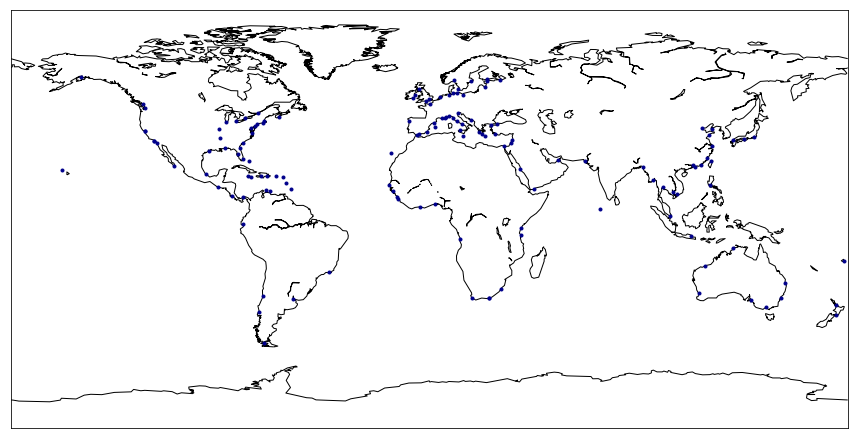

In [115]:
# Let's visualise it

plt.figure(figsize=(15,15))
map = Basemap()
map.drawcoastlines()

for port in ports_2.index:
    map.plot(list(ports_2.loc[port].geometry.coords)[0][0],
            list(ports_2.loc[port].geometry.coords)[0][1],color='darkblue',marker='o',markersize=3)

plt.show()

In [44]:
ports_2.columns

Index(['scalerank', 'featurecla', 'name', 'website', 'natlscale', 'geometry'], dtype='object')

In [45]:
ports_2.shape

(143, 6)

In [46]:
ports_2.head()

,scalerank,featurecla,name,website,natlscale,geometry
0,3,Port,Oranjestad,www.arubaports.com,75.0,POINT (-70.03881036999999 12.52)
1,3,Port,Dubai,www.dpa.ae,75.0,POINT (55.26931684 25.26722222)
2,3,Port,Buenos Aires,www.puertobuenosaires.gov.ar,75.0,POINT (-58.3696702 -34.59916667)
3,3,Port,Darwin,www.darwinport.nt.gov.au,75.0,POINT (130.854947 -12.47027778)
4,3,Port,Melbourne,www.portofmelbourne.com,75.0,POINT (144.9171967 -37.83277778)


### Let's now

In [3]:
# Opening the Open Document Sheet
doc = ezodf.opendoc('Data Sources/UK Port Freight (2)/port-freight-statistics-2017/port0400.ods')
# Data sheet
sheet = doc.sheets[2]

In [11]:
# A way to extract the data
start = time.time()
totalContent = []
for i,row in enumerate(sheet.rows()):
    if i == 0:
        columns = [cell.value for cell in row]
        
        columns = columns[:-1]
        
#         individualUKPortData = pd.DataFrame(columns = columns)
    if 0 < i:
    
        content = [cell.value for cell in row]
        totalContent.append(content[:-1])
        
        #individualUKPortData.loc[i] = content
individualUKPortData = pd.DataFrame(totalContent,columns = columns)
end = time.time()

print('The processing took %.3f seconds' % (end-start))

The processing took 4.491 seconds


In [12]:
individualUKPortData.shape

(89893, 7)

In [14]:
individualUKPortData.head()

,Reporting Port,Year,direction,Cargo_Code,Region,Type,Value (thousands)
0,Aberdeen,2017.0,1.0,13.0,Domestic traffic,Tonnage,330584.769968
1,Aberdeen,2017.0,1.0,13.0,Domestic traffic,Tonnage,512502.510709
2,Aberdeen,2017.0,1.0,13.0,European Union traffic,Tonnage,81612.719323
3,Aberdeen,2017.0,1.0,13.0,Domestic traffic,Units,0.000000
4,Aberdeen,2017.0,1.0,13.0,Domestic traffic,Units,0.000000
